In [1]:
import datajoint as dj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
dj.conn()

Please enter DataJoint password:  ············


Connecting ttngu207@tutorial-db.datajoint.io:3306


DataJoint connection (connected) ttngu207@tutorial-db.datajoint.io:3306

In [3]:
dj.config['display.limit'] = 10
dj.config['display.width'] = 30

In [4]:
subject = dj.create_virtual_module('subject', 'ttngu207_aeon_subject')
lab = dj.create_virtual_module('lab', 'ttngu207_aeon_lab')
tracking = dj.create_virtual_module('tracking', 'ttngu207_aeon_tracking')
experiment = dj.create_virtual_module('experiment', 'ttngu207_aeon_experiment')

# Pipeline architecture

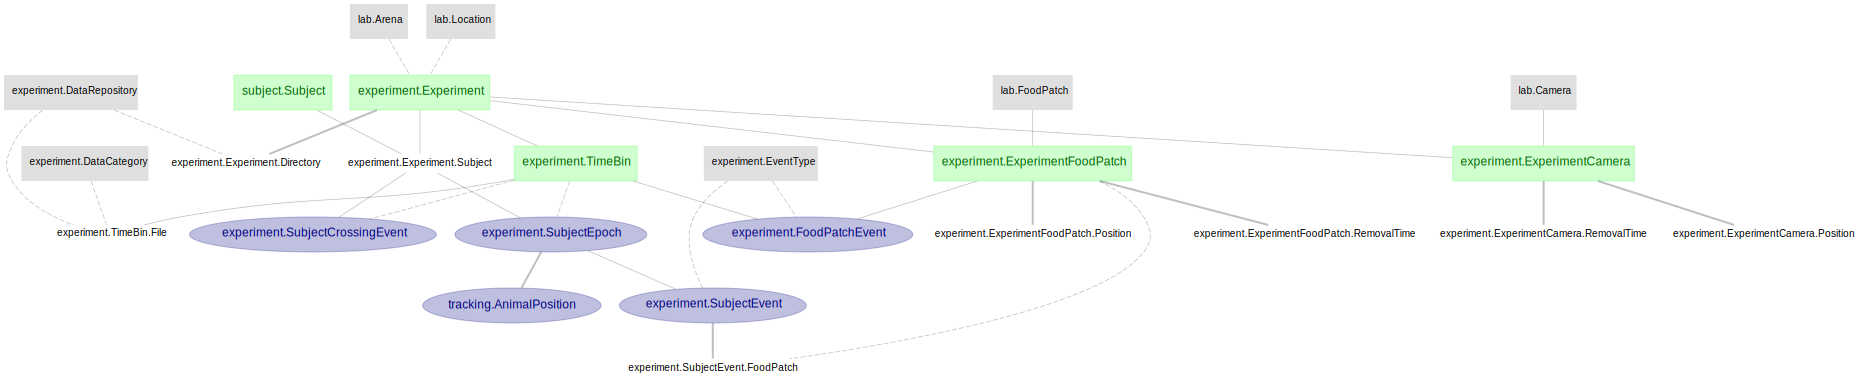

In [5]:
dj.Diagram(experiment) + 1 - 1

In [6]:
experiment.TimeBin()

experiment_name e.g exp0-a,time_bin_start datetime of the start of this recorded TimeBin,time_bin_end datetime of the end of this recorded TimeBin
exp0-r0,2021-03-25 15:00:00,2021-03-25 18:00:00
exp0-r0,2021-03-25 18:00:00,2021-03-25 21:00:00
exp0-r0,2021-03-25 21:00:00,2021-03-26 00:00:00
exp0-r0,2021-03-26 09:00:00,2021-03-26 12:00:00
exp0-r0,2021-03-26 12:00:00,2021-03-26 15:00:00
exp0-r0,2021-03-26 15:00:00,2021-03-26 18:00:00
exp0-r0,2021-03-26 18:00:00,2021-03-26 21:00:00
exp0-r0,2021-03-26 21:00:00,2021-03-27 00:00:00
exp0-r0,2021-03-28 06:00:00,2021-03-28 09:00:00


In [7]:
experiment.SubjectEpoch()

experiment_name e.g exp0-a,subject,epoch_start datetime of the start of this Epoch,epoch_end datetime of the end of this Epoch,time_bin_start datetime of the start of this recorded TimeBin
exp0-r0,BAA-1099590,2021-03-25 15:00:00,2021-03-25 15:30:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 15:30:00,2021-03-25 16:00:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 16:00:00,2021-03-25 16:30:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 16:30:00,2021-03-25 17:00:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 17:00:00,2021-03-25 17:30:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 17:30:00,2021-03-25 18:00:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 18:00:00,2021-03-25 18:30:00,2021-03-25 18:00:00
exp0-r0,BAA-1099590,2021-03-26 15:30:00,2021-03-26 16:00:00,2021-03-26 15:00:00
exp0-r0,BAA-1099590,2021-03-26 16:00:00,2021-03-26 16:30:00,2021-03-26 15:00:00
exp0-r0,BAA-1099590,2021-03-26 16:30:00,2021-03-26 17:00:00,2021-03-26 15:00:00


# Example Queries

## 1. Select all position data for mouse: ***BAA-1099590*** on ***2021-03-25*** when the animal was in the lower left quadrant 

In [8]:
experiment.Experiment * lab.Arena & 'experiment_name = "exp0-r0"'

experiment_name e.g exp0-a,arena_name unique name of the arena (e.g. circular_2m),experiment_start_time datetime of the start of this experiment,experiment_description,lab Abbreviated lab name,location,arena_description,arena_shape,arena_x_dim (m) x-dimension of the bounding box of this arena,arena_y_dim (m) y-dimension of the bounding box of this arena,arena_z_dim (m) z-dimension of this arena (e.g. wall height)
exp0-r0,circle-2m,2021-03-25 15:00:00,experiment 0,SWC,room-0,circular arena with 2-meter diameter,circular,2.0,2.0,0.2


#### Get arena dimensions

In [9]:
arena_x_dim, arena_y_dim = (experiment.Experiment * lab.Arena & 'experiment_name = "exp0-r0"').fetch1('arena_x_dim', 'arena_y_dim')

#### Find epochs containing position data from subject ***BAA-1099590*** that are in the lower-left quadrant of the arena

In [10]:
epoch_position_query = (tracking.EpochPosition
                        & 'subject = "BAA-1099590"' 
                        & 'epoch_start BETWEEN "2021-03-25 00:00:00" and "2021-03-25 23:59:59"'
                        & f'x < {arena_x_dim*1000 / 2}'
                        & f'y < {arena_y_dim*1000 / 2}')
epoch_position_query

x,y,z,experiment_name e.g exp0-a,subject,epoch_start datetime of the start of this Epoch
0.00,0.00,0.00,exp0-r0,BAA-1099590,2021-03-25 15:00:00
0.00,0.00,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
0.00,0.00,0.00,exp0-r0,BAA-1099590,2021-03-25 17:30:00
11.48,821.24,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
11.64,763.03,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
11.80,780.76,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
11.89,787.40,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
11.90,218.40,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
11.91,799.14,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00
11.91,822.64,0.00,exp0-r0,BAA-1099590,2021-03-25 17:00:00


In [11]:
epochs = experiment.SubjectEpoch & epoch_position_query
epochs

experiment_name e.g exp0-a,subject,epoch_start datetime of the start of this Epoch,epoch_end datetime of the end of this Epoch,time_bin_start datetime of the start of this recorded TimeBin
exp0-r0,BAA-1099590,2021-03-25 15:00:00,2021-03-25 15:30:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 15:30:00,2021-03-25 16:00:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 16:00:00,2021-03-25 16:30:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 16:30:00,2021-03-25 17:00:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 17:00:00,2021-03-25 17:30:00,2021-03-25 15:00:00
exp0-r0,BAA-1099590,2021-03-25 17:30:00,2021-03-25 18:00:00,2021-03-25 15:00:00


#### Retrieve position data from those epochs

In [12]:
tracking.AnimalPosition & epochs

experiment_name e.g exp0-a,subject,epoch_start datetime of the start of this Epoch,"timestamps (s) timestamps of the position data, w.r.t the start of the TimeBlock containing this Epoch","position_x (m) animal's x-position, in the arena's coordinate frame","position_y (m) animal's y-position, in the arena's coordinate frame","position_z (m) animal's z-position, in the arena's coordinate frame",speed (m/s) speed
exp0-r0,BAA-1099590,2021-03-25 15:00:00,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
exp0-r0,BAA-1099590,2021-03-25 15:30:00,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
exp0-r0,BAA-1099590,2021-03-25 16:00:00,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
exp0-r0,BAA-1099590,2021-03-25 16:30:00,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
exp0-r0,BAA-1099590,2021-03-25 17:00:00,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
exp0-r0,BAA-1099590,2021-03-25 17:30:00,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [13]:
timestamps, position_x, position_y = (tracking.AnimalPosition & epochs).fetch('timestamps', 'position_x', 'position_y', order_by='epoch_start')

In [14]:
timestamps = np.hstack(timestamps)
position_x = np.hstack(position_x)
position_y = np.hstack(position_y)

In [15]:
lower_left_quadrant = np.logical_and(position_x < arena_x_dim*1000 / 2, position_x < arena_y_dim*1000 / 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [16]:
timestamps = timestamps[lower_left_quadrant]
position_x = position_x[lower_left_quadrant]
position_y = position_y[lower_left_quadrant]

#### Plot

Text(0, 0.5, 'Arena Y-dim (mm)')

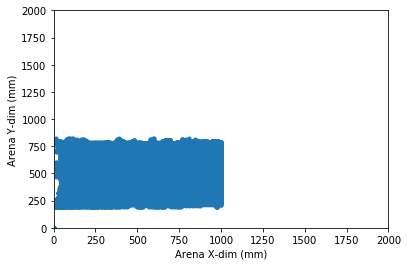

In [17]:
fig, ax = plt.subplots(1,1)
ax.plot(position_x, position_y, '.')
ax.set_xlim([0, arena_x_dim*1000])
ax.set_ylim([0, arena_y_dim*1000])
ax.set_xlabel('Arena X-dim (mm)')
ax.set_ylabel('Arena Y-dim (mm)')

## 2. For every time Patch 0 is turned ON, select the distance time-series between mouse ***BAA-1099590*** and Patch 0, 2 seconds before and 5 seconds after 

In [18]:
patch0_on_events = experiment.FoodPatchEvent * experiment.EventType & 'food_patch_id = 0' & 'event_type = "TriggerPellet"'
patch0_on_events

experiment_name e.g exp0-a,time_bin_start datetime of the start of this recorded TimeBin,food_patch_id,food_patch_installed_time time of the food_patch placed and started operation at this position,event_number,event_code,event_time event time,event_type
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,0,35,2021-03-25 15:01:35.591000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,2,35,2021-03-25 15:01:56.718000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,4,35,2021-03-25 15:03:28.182000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,6,35,2021-03-25 15:03:37.703000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,8,35,2021-03-25 15:17:10.551000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,10,35,2021-03-25 15:18:15.091000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,12,35,2021-03-25 15:18:25.626000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,14,35,2021-03-25 15:18:33.351000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,16,35,2021-03-25 15:18:42.935000,TriggerPellet
exp0-r0,2021-03-25 15:00:00,0,2021-03-25 15:00:00,18,35,2021-03-25 15:18:46.547000,TriggerPellet


#### Pick one Patch 0 ON event

In [19]:
patch0_on_event = patch0_on_events.fetch(as_dict=True)[11]
patch0_on_event

{'experiment_name': 'exp0-r0',
 'time_bin_start': datetime.datetime(2021, 3, 25, 15, 0),
 'food_patch_id': 0,
 'food_patch_installed_time': datetime.datetime(2021, 3, 25, 15, 0),
 'event_number': 22,
 'event_code': 35,
 'event_time': datetime.datetime(2021, 3, 25, 15, 19, 3, 794000),
 'event_type': 'TriggerPellet'}

#### Get corresponding foodpatch location

In [20]:
experiment.ExperimentFoodPatch & (experiment.FoodPatchEvent & patch0_on_event)

experiment_name e.g exp0-a,food_patch_id,food_patch_installed_time time of the food_patch placed and started operation at this position
exp0-r0,0,2021-03-25 15:00:00


In [21]:
food_patch_position = (experiment.ExperimentFoodPatch.Position & (experiment.FoodPatchEvent & patch0_on_event)).fetch1('food_patch_position_x', 'food_patch_position_y')
food_patch_position = np.array(food_patch_position) * 1000
food_patch_position

array([1000., 1000.])

#### Specify pre/post event time

In [22]:
event_time = patch0_on_event["event_time"]

In [23]:
pre_event_time = patch0_on_event["event_time"] - datetime.timedelta(seconds=2)
pre_event_time

datetime.datetime(2021, 3, 25, 15, 19, 1, 794000)

In [24]:
post_event_time = patch0_on_event["event_time"] + datetime.timedelta(seconds=5)
post_event_time

datetime.datetime(2021, 3, 25, 15, 19, 8, 794000)

#### Find all epochs from ***BAA-1099590*** containing either of the pre/post event time

In [25]:
epochs = (experiment.SubjectEpoch & 'subject = "BAA-1099590"'
          & [f'epoch_start <= "{pre_event_time}" AND epoch_end > "{pre_event_time}"',
             f'epoch_start <= "{post_event_time}" AND epoch_end > "{post_event_time}"'])
epochs

experiment_name e.g exp0-a,subject,epoch_start datetime of the start of this Epoch,epoch_end datetime of the end of this Epoch,time_bin_start datetime of the start of this recorded TimeBin
exp0-r0,BAA-1099590,2021-03-25 15:00:00,2021-03-25 15:30:00,2021-03-25 15:00:00


#### Extract animal position data

In [26]:
timestamps, position_x, position_y = (tracking.AnimalPosition & epochs).fetch('timestamps', 'position_x', 'position_y', order_by='epoch_start')
timestamps = np.hstack(timestamps)
position_x = np.hstack(position_x)
position_y = np.hstack(position_y)

In [27]:
in_time_range = np.logical_and(timestamps >= pre_event_time, timestamps < post_event_time)

In [28]:
timestamps = timestamps[in_time_range]
position_x = position_x[in_time_range]
position_y = position_y[in_time_range]

#### Plot

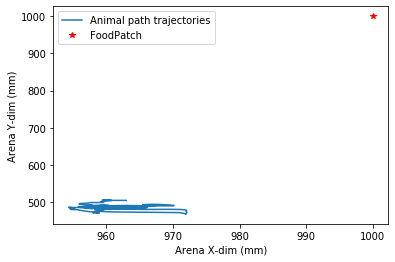

In [29]:
fig, ax = plt.subplots(1,1)
ax.plot(position_x, position_y, label='Animal path trajectories')
ax.plot(*food_patch_position, '*r', label='FoodPatch')
ax.set_xlabel('Arena X-dim (mm)')
ax.set_ylabel('Arena Y-dim (mm)')
ax.legend()